# Final Capstone Project

# Section 1: Introduction


Vegetarians and vegans now account for nearly 10 per cent of Canada’s population, and their increased presence is forcing the restaurant and meat production industries to consider new approaches. 

According to research from Dalhousie University, there are 2.3 million vegetarians in Canada, up from 900,000 15 years ago. Another 850,000 people consider themselves vegan. Those two numbers add up to 9.4 per cent of the Canadian population. The interested readers could refer to the link below:

https://www.ctvnews.ca/canada/more-than-3-million-canadians-vegetarian-or-vegan-study-1.4027606


Since the most populated city in Canada is Toronto. It is home to 5,429,524 people. Toronto is the capital of Ontario and located in the east-central region of the country. Nearly half of the population is made up of foreign-born residents. After Miami in the US, this is the second largest percentage of foreign-born residents in the world. Interestingly, no nationality holds the dominant position, making Toronto the most diverse city in the world. Therefore we are going to explore Toronto 
for our business prospects. The interested readers could refer to the link below:

https://www.worldatlas.com/articles/biggest-cities-in-canada.html


# Section 2:  Business Problem and Interested Community

With increasing number of people turing vegetarian and vegan, there is a good scope 
of opening the Vegetarian/Vegan Restaurant. Based on this we define the following:

__Problem__: The aim of this project is to explore the possibility of opening Fruit & Vegetable Stores 
near Vegetarian/Vegan Restaurants in Canada. 

__Interested Community__: Food Business Industry

1. The results of this project could be of interest to the investors 
    who wants to invest in a Food Business.      
    
2. Since the vegetarian/veagn restaurants would provide good retail opportunities for Fruits &    Vegetables Store. Therefore, the results could be of interest to the investors who wants to invest in these stores. 

3. The Juice Bars are also potential customers for Fruits &    Vegetables Store.

# Section 3: Data Sources

### Toronto neighborhood data: 


#### Data Source: 

https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M

#### Description: 
For the Toronto neighborhood data, a Wikipedia page exists 
that has all the information we need to explore and cluster the Borough and their neighborhoods in Toronto. 


### Vegetarian/Vegan restaurants and Juice Bars in each Borough and their neighborhoods of Toronto.

#### Data source: 
Fousquare API https://foursquare.com/

#### Description:
By using this API we will get all the venues in each neighborhood. We can filter these venues to get explore the possibilities of opening Vegetarian/Vegan restaurants.



### Geospatial Coordinates

#### Data source: 
http://cocl.us/Geospatial_data

#### Description:

To utilize the Foursquare location data, we will get the latitude and the longitude coordinates of each neighbourhood.


# Section 4: Methodology

Before going into details, lets put down some steps:

__Data Loading and Extraction__:

*Step 1:* Importing all the necessary libraries

*Step 2:* Web Scraping using BeautifulSoup:  To obtain information regarding  Postal Code
Borough, Neighbors

__Data Preprocessing__:

*Step 3:* Data Preprocessing and Cleaning: Formatting the text and remove the duplicate and Null entries

__Exploratory Data Analysis__:

*Step 4:* Obtaining geospatial coordinates: To obtain information regarding Latitudes and Longitudes corresponding to Postal Codes

*Step 5:* Using Foilum: To visualize  Leaflet map of Toronto via Folium

*Step 6:* Foursqaure API: To obtain the information regarding point of interest in detail. Here we are particulary looking at Vegetarian/ Vegan restaurants and Juice Bars.

__Machine Learning Technique__:

*Step 7:* K-means Clustering: Here we use unsupervised machine learning techniques known as K-means clustering as the aim of this project is to find the geo-spatial coordinates for
Fruits and Vegetables Store.


## A. Data Loading and Extraction:

### Step 1: Importing necessary libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner
from bs4 import BeautifulSoup
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### Step 2: Download and Explore Dataset

#### Parsing using Beautiful Soup:
We will begin with defining the function that will provide us the parsed dataframe.

In [2]:
def parseData(url_param):
    url= url_param
    website_url=requests.get(url).text

    soup = BeautifulSoup(website_url,'lxml')
    M_table = soup.find('table',{'class':'wikitable sortable'})
    headers= [header.text for header in M_table.find_all('th')]
    headers[-1] = headers[-1].strip() # obtain the dataframe columns   
    
    rows = []
    for row in M_table.find_all('tr'):
        rows.append([val.text.encode('utf8').strip().decode("utf-8") for val in row.find_all('td')])
        dataFrame = pd.DataFrame(rows[1:], columns=headers) # Remove the None row, can be seen by selecting all rows
    
    return dataFrame

Pass the url as an argument that we we want to Parse

In [132]:
url= 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
df = parseData(url)
df.head(10)

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
7,M7A,Downtown Toronto,Queen's Park
8,M8A,Not assigned,Not assigned
9,M9A,Etobicoke,Islington Avenue


Our  dataframe  consist of three columns: PostalCode, Borough, and Neighborhood and it is structured. 
But it contains Not assigned entries and then certain post codes which are occurring more than once. e.g., M6A. It means our data will require further processing and cleaning which is done in Section below:

## B. Data Preprocessing

In this Section, we will build a dataframe of the postal code of each neighbourhood along with the borough name and neighbourhood name.

### Step 3: Data Preprocessing and Cleaning
1. Removing the entries of Borough which  is not assigned.

2. Assigning the neighborhood as a  borough, where neighborhood  is Not assigned 

In [4]:
df['Borough'] = df['Borough'].replace('Not assigned', float('nan'))
if df['Borough'] is not None:
    df['Neighbourhood'] = df['Neighbourhood'].replace('Not assigned', df['Borough'])  
    
    
df=df.dropna()
print(df.shape)
df.head() # Check all the Not assigned entries are removed


(210, 3)


,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor


####  Grouping by Postcode to remove duplicate entries
 Additional step: group by Borough for understanding postal code distribution, makes things easier in Part 2 and clustering

In [5]:
df1=df.groupby(['Postcode','Borough'])['Neighbourhood'].unique()
df_uq=df1.to_frame().reset_index()
df_uq['Neighbourhood']= df_uq['Neighbourhood'].transform(lambda x: ', '.join(x))

df_uq.head()

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


__Findings__: 
As can be seen now M1C and M1E are combined
into one row with the neighborhoods separated with a comma.
Now we have unique Postal codes.

#### Shape of final dataset

In [6]:
df_uq.shape

(103, 3)



Now in this Section, in order to utilize the Foursquare location data, we will get the latitude and the longitude coordinates of each neighbourhood.

## C. Exploratory Data Analysis:

In this section we will do analysis if it make sense to choose Toronto as a place for opening Fruits and Vegetable Store. It is always better to do this kind of analysis as without having the insight of Problem in hand , we may end up with a model which may not produce desired results.

### Step 4:  Geospatial Coordinates

Here’s we obtain latitude and longitude:
Latitude lines run east-west and are parallel to each other.
Longitude lines run north-south.


In [133]:
url = 'http://cocl.us/Geospatial_data'
df_geo=pd.read_csv(url)


#!wget -q http://cocl.us/Geospatial_data

#df_geo=pd.read_csv('Geospatial_Coordinates.csv')


print(df_geo.shape)  #to check if the spatial coordinates matches our output datashape
df_geo.head()

(103, 3)


,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


#### Now we merge the data frame of geospatial coordinates with that of our cleaned dataframe.

In [8]:
if df_uq['Postcode'].equals(df_geo['Postal Code']):  # Cross check if both df_geo and df_uq are equal
    df_uq['Latitude']=df_geo['Latitude']
    df_uq['Longitude']=df_geo['Longitude']

df_uq.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


Lets try to find out the neighbors per Borough.

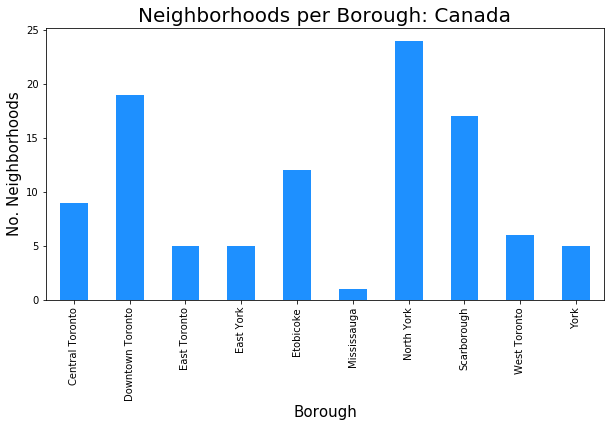

In [9]:
clr = "dodgerblue"
df_uq.groupby('Borough')['Neighbourhood'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('Neighborhoods per Borough: Canada', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. Neighborhoods',fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

__Findings__:
As can be seen in the above Graph, if we combine different Borough of 'Toronto', 
the number of neighbors are going to be highest. Now, we will explore and cluster the neighbourhood of Toronto further.

####  Filter the boroughs that contain the word Toronto 

In [52]:
tr_df=df_uq[df_uq['Borough'].str.contains('Toronto')]

tr_df.reset_index(drop=True, inplace=True)
print(tr_df.shape)
    
tr_df.head()



(39, 5)


,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


####  Use geopy library to get the latitude and longitude values of Toronto.
__Note__ :This step is optional to see how geopy works.
Latitude and longitude can be obtained from the df_tr in the above step

In order to define an instance of the geocoder, we need to define a user_agent. 
We will name our agent <em>tr_explorer</em>, as shown below.

In [11]:
address = 'Toronto'

geolocator = Nominatim(user_agent="tr_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


### Step 5: Using Folium:



Here we use Folium  that builds on the data wrangling strengths of the Python ecosystem and the mapping strengths of the Leaflet.js library. 

In this section we will manipulate our data in Python, then visualize it in on a Leaflet map via Folium. In other words, we will create a map of Toronto with neighborhoods superimposed on top.

In [12]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighbourhood in zip(tr_df['Latitude'], tr_df['Longitude'],
                                           tr_df['Borough'], tr_df['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

### Step 6: Foursqaure API:
By now we have built a dataframe of the postal code of each neighbourhood along with the borough name and neighbourhood name. In order to utilize the Foursquare location data, we have also got the latitude and the longitude coordinates of each neighbourhood for Toronto.
Next, we are going to  start utilizing the Foursquare API to explore the neighbourhoods and segment them based on vegetarain/vegan restaurants and Juice Bars.

In [13]:
CLIENT_ID = 'L3ASOH21PLOK0FAGU0ENKSBLOELN1ZQLTCRT3ZB5NZPJXPEF' # your Foursquare ID
CLIENT_SECRET = 'NC4LIKESX3AKSTLTTBQRQEVCESUA1ZCTID3KLZ5XFWAHTOWX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

LIMIT = 100 

Your credentails:
CLIENT_ID: L3ASOH21PLOK0FAGU0ENKSBLOELN1ZQLTCRT3ZB5NZPJXPEF
CLIENT_SECRET:NC4LIKESX3AKSTLTTBQRQEVCESUA1ZCTID3KLZ5XFWAHTOWX


Let's create a function to explore the neighbourhoods in Toronto

In [23]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)



def getVenueDetails(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df_details = pd.DataFrame(venue_details,columns=column_names)
    return df_details



def getVenues(lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df_venues = pd.DataFrame(venue_details,columns=column_names)
    return df_venues


__Note__: Run the code below only once as we have limited number of calls

In [15]:
# Only run it once because of limited calls allowed.          

#tr_venues = getNearbyVenues(names=tr_df['Neighbourhood'],
                                   #latitudes=tr_df['Latitude'],
                                   #longitudes=tr_df['Longitude']
                                  #)
                          
#tr_venues.to_csv('tr_venues.csv')

Let's check the size of the resulting dataframe.

In [17]:
tr_venues= pd.read_csv('tr_venues.csv', index_col=0)
tr_venues.reset_index(drop=True, inplace=True)
print(tr_venues.shape)
tr_venues.head()

(1715, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,"The Danforth West, Riverdale",43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant


We obtained the information about Venue, its latitude, longitude and category as shown above. 
#### Now,  let's find out the unique categories of venues can be curated from all the returned venues

In [124]:
print('There are {} uniques categories.'.format(len(tr_venues['Venue Category'].unique())))

#tr_venues['Venue Category'].unique()

There are 233 uniques categories.


We have find out the unique categories of venues that can be curated from all the returned venues. The categories which are of interest to us are:

1. Vegetarian / Vegan Restaurant
2. Juice Bars



Lets explore them in detail one by one.
We will look for the Vegetarian restaurants in that area.

#### Get details about the vegetarian Restaurant

In [24]:
column_names=['Postcode', 'Borough', 'Neighbourhood', 'ID','Name', 'Latitude', 'Longitude']
veg_rest=pd.DataFrame(columns=column_names)
count=1
for row in tr_df.values.tolist():
    Postcode, Borough, Neighbourhood, Latitude, Longitude=row
    venues = getVenues(Latitude,Longitude) # Avoid running it twice will cost calls
    veg_resturants=venues[venues['Category']=='Vegetarian / Vegan Restaurant']   
    #print('(',count,'/',len(tr_df),')','Vegetarian Resturants in '+Neighbourhood+', '+Borough+':'+str(len(veg_resturants)))
    #print(row)
    for resturant_detail in veg_resturants.values.tolist():
        id, name , category=resturant_detail
        veg_rest = veg_rest.append({ 'Postcode': Postcode,           
                                                'Borough': Borough,
                                                'Neighbourhood': Neighbourhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Latitude':  Latitude,
                                                'Longitude': Longitude
                                               }, ignore_index=True)
    count+=1

#### Save the obtained results from Foursquare to csv format. 
This step is important as we have limited number of calls that we can  make.

In [25]:
veg_rest.to_csv('veg_rest.csv') # Save the information so far to a .csv file due to limited calls on FourSquare
df_veg_rest = pd.read_csv('veg_rest.csv', index_col=0)
df_veg_rest.head()

,Postcode,Borough,Neighbourhood,ID,Name,Latitude,Longitude
0,M5E,Downtown Toronto,Berczy Park,5b5bca904aa3f8002c97f85d,Fresh On Front,43.644771,-79.373306
1,M5H,Downtown Toronto,"Adelaide, King, Richmond",5aff06ca6e4650002cc6286b,Rosalinda,43.650571,-79.384568
2,M5H,Downtown Toronto,"Adelaide, King, Richmond",5c9d602f25fb7b002c79b669,Planta Queen,43.650571,-79.384568
3,M5J,Downtown Toronto,"Harbourfront East, Toronto Islands, Union Station",5481b06c498ee191fa045a00,Kupfert & Kim,43.640816,-79.381752
4,M5R,Central Toronto,"The Annex, North Midtown, Yorkville",4ad4c061f964a52099f720e3,Live Organic Food Bar,43.672710,-79.405678


In [54]:
print(df_veg_rest.shape)
df_veg_rest['Neighbourhood'].count()

(12, 7)


12

__Findings__:
Out of 39 Neighbour counts of Toronto, we are left only with 12 neighbor counts having Vegetarian/Vegan 
restaurants.

#### Now comes the question which Borough has the highest count of vegetarian restaurant?

We are going to explore this next in the Section below.

In [41]:
df_veg_rest_group =df_veg_rest.groupby('Borough')['ID'].count()
df_veg_gr=df_veg_rest_group.to_frame().reset_index()
df_veg_gr


,Borough,ID
0,Central Toronto,1
1,Downtown Toronto,10
2,West Toronto,1


#### This can be seen visually on the below:

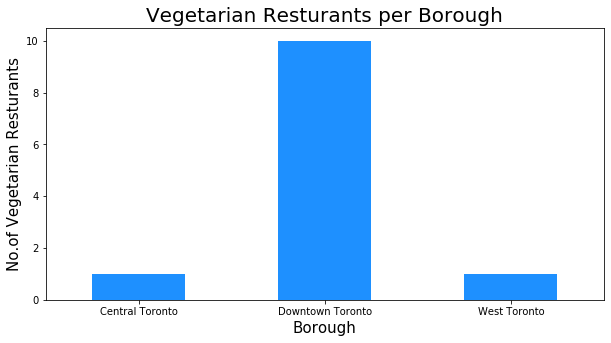

In [134]:
df_veg_rest.groupby('Borough')['ID'].count().plot.bar(figsize=(10,5), color = clr)
plt.title('Vegetarian Resturants per Borough', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No.of Vegetarian Resturants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

__Findings__: 
From the bar graph it makes sense if we open the Fruits and Vegetables store in DownTown Toronto
as it has the highest number of Vegetarian Restaurants.

In [56]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighbourhood in zip(df_veg_rest['Latitude'], df_veg_rest['Longitude'],
                                           df_veg_rest['Borough'], df_veg_rest['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
#map_toronto


# add pop-up text to each marker on the map
latitudes = list(df_veg_rest['Latitude'])
longitudes = list(df_veg_rest['Longitude'])
labels = list( df_veg_rest['Borough'])

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(map_toronto)    
    
# add incidents to map
map_toronto.add_child(incidents)

#### Next we are going to move towards getting details about the Juice Bar in Toronto

In [59]:
column_names=['Postcode', 'Borough', 'Neighbourhood', 'ID','Name', 'Latitude', 'Longitude']
juice_bar=pd.DataFrame(columns=column_names)
count=1
for row in tr_df.values.tolist():
    Postcode, Borough, Neighbourhood, Latitude, Longitude=row
    #venues = getVenues(Latitude,Longitude) # Avoid running it twice will cost calls
    juice_bars=venues[venues['Category']=='Juice Bar']   
    for jb_detail in juice_bars.values.tolist():
        id, name , category=jb_detail
        juice_bar = juice_bar.append({ 'Postcode': Postcode,           
                                                'Borough': Borough,
                                                'Neighbourhood': Neighbourhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Latitude':  Latitude,
                                                'Longitude': Longitude
                                               }, ignore_index=True)
    count+=1

In [61]:
#juice_bar.to_csv('juice_bar.csv') # Save the information so far to a .csv file due to limited calls on FourSquare
df_juice_bar = pd.read_csv('juice_bar.csv', index_col=0)
df_juice_bar.head()

,Postcode,Borough,Neighbourhood,ID,Name,Latitude,Longitude
0,M4K,East Toronto,"The Danforth West, Riverdale",4bd1db4e046076b0f1a57271,The Big Carrot Organic Juice Bar,43.679557,-79.352188
1,M4Y,Downtown Toronto,Church and Wellesley,50c20a89e4b02803a189384b,FUEL+,43.665860,-79.383160
2,M5B,Downtown Toronto,"Ryerson, Garden District",4bdf1c4bffdec92826c0eaa1,Booster Juice,43.657162,-79.378937
3,M5G,Downtown Toronto,Central Bay Street,4b9a73ecf964a5209db635e3,Booster Juice,43.657952,-79.387383
4,M5G,Downtown Toronto,Central Bay Street,5beccbec2b274a002c3ef499,Booster Juice,43.657952,-79.387383


In [62]:
print(df_juice_bar.shape)
df_juice_bar['Neighbourhood'].count()

(10, 7)


10

__Findings__:
Out of 39 Neighbour counts of Toronto, we are left only with 10 neighbor counts having Juice Bars.

To find  which Borough has the highest count of Juice Bars, 
we explored the number of Juice Bars per Borough as shown below:

In [63]:
df_juice_bar_group =df_juice_bar.groupby('Borough')['ID'].count()
df_juice_bar_gr=df_juice_bar_group.to_frame().reset_index()
df_juice_bar_gr


,Borough,ID
0,Downtown Toronto,8
1,East Toronto,1
2,West Toronto,1


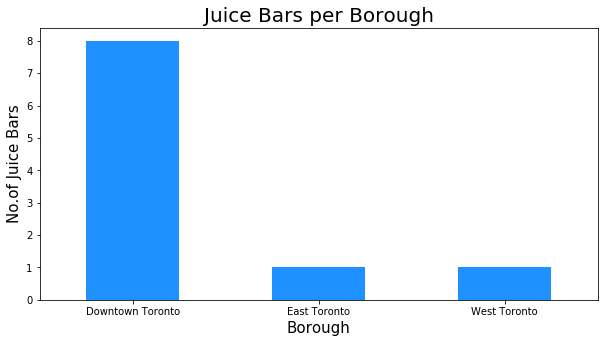

In [135]:
df_juice_bar.groupby('Borough')['ID'].count().plot.bar(figsize=(10,5), color = clr)
plt.title('Juice Bars per Borough', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No.of Juice Bars', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

In [136]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighbourhood in zip(df_juice_bar['Latitude'], df_juice_bar['Longitude'],
                                           df_juice_bar['Borough'], df_juice_bar['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
#map_toronto


# add pop-up text to each marker on the map
latitudes = list(df_juice_bar['Latitude'])
longitudes = list(df_juice_bar['Longitude'])
labels = list( df_juice_bar['Borough'])

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(map_toronto)    
    
# add incidents to map
map_toronto.add_child(incidents)

__Findings__: As can be seen from the results, the number of Juice Bars are also highest in Downtown Toronto. 
In the beginning of the Problem, we defined that these two could be our potential customers.
And for both the potential customers, Downtown Toronto is the good choice.

This completes our analysis approach. Now after having an idea lets try to find out what comes
from the results of machine learning.

## D.	Machine Learning Technique:

### Step 7: K-Means Clustering: 

We choose k-mean clustering because our problem is related to __cluster analysis__. 

As can be seen from the results of Exploratory data Analysis, in our problem as well we have clusters corresponding to different Boroughs.


## Cluster Vegetarian/Vegan Restaurants 
 As in the Exploratory Data Analysis section we will start with the Vegetarian Restaurants and then will  move to Juice Bars.

In [88]:
#del df_veg_rest['Cluster Labels']
clusterNum = 3
veg_rest_clustering = df_veg_rest.drop(['Postcode','Borough','Neighbourhood', 'ID','Name'],1)
k_means_rest = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12).fit(veg_rest_clustering)
#kmeans = KMeans(n_clusters = k,random_state=0).fit(veg_rest_clustering)
k_means_rest.labels_
df_veg_rest.insert(0, 'Cluster Labels', k_means_rest.labels_)
df_veg_rest

,Cluster Labels,Postcode,Borough,Neighbourhood,ID,Name,Latitude,Longitude
0,0,M5E,Downtown Toronto,Berczy Park,5b5bca904aa3f8002c97f85d,Fresh On Front,43.644771,-79.373306
1,0,M5H,Downtown Toronto,"Adelaide, King, Richmond",5aff06ca6e4650002cc6286b,Rosalinda,43.650571,-79.384568
2,0,M5H,Downtown Toronto,"Adelaide, King, Richmond",5c9d602f25fb7b002c79b669,Planta Queen,43.650571,-79.384568
3,0,M5J,Downtown Toronto,"Harbourfront East, Toronto Islands, Union Station",5481b06c498ee191fa045a00,Kupfert & Kim,43.640816,-79.381752
4,1,M5R,Central Toronto,"The Annex, North Midtown, Yorkville",4ad4c061f964a52099f720e3,Live Organic Food Bar,43.672710,-79.405678
5,1,M5T,Downtown Toronto,"Chinatown, Grange Park, Kensington Market",4b2d2ab2f964a52007d024e3,Hibiscus,43.653206,-79.400049
6,1,M5T,Downtown Toronto,"Chinatown, Grange Park, Kensington Market",4ae4e982f964a5205d9f21e3,Buddha's Vegetarian,43.653206,-79.400049
7,1,M5T,Downtown Toronto,"Chinatown, Grange Park, Kensington Market",4ad7e7acf964a520f40f21e3,Urban Herbivore,43.653206,-79.400049
8,0,M5W,Downtown Toronto,Stn A PO Boxes 25 The Esplanade,5b5bca904aa3f8002c97f85d,Fresh On Front,43.646435,-79.374846
9,0,M5X,Downtown Toronto,"First Canadian Place, Underground city",5aff06ca6e4650002cc6286b,Rosalinda,43.648429,-79.382280


#### Visualize the number of Borough corresponding to different cluster Labels using Folium.

In [89]:
# create map
incidents = folium.map.FeatureGroup()
map_clusters = folium.Map(location=[43.651070,-79.347015],zoom_start=10)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, neighbourhood, cluster in zip(df_veg_rest['Latitude'], df_veg_rest['Longitude'], df_veg_rest['Neighbourhood'], df_veg_rest['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Find the number of Borough corresponding to different cluster Labels.

### Step 8: K-Means Clustering: Cluster Juice Bars 

In [115]:
#del df_juice_bar['Cluster Labels']
clusterNum=3
juice_clustering = df_juice_bar.drop(['Postcode','Borough','Neighbourhood', 'ID','Name'],1)
#kmeans = KMeans(n_clusters = k,random_state=0).fit(juice_clustering)
k_means_juice = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12).fit(juice_clustering)
k_means_juice.labels_
df_juice_bar.insert(0, 'Cluster Labels', k_means_juice.labels_)
df_juice_bar

,Cluster Labels,Postcode,Borough,Neighbourhood,ID,Name,Latitude,Longitude
0,2,M4K,East Toronto,"The Danforth West, Riverdale",4bd1db4e046076b0f1a57271,The Big Carrot Organic Juice Bar,43.679557,-79.352188
1,0,M4Y,Downtown Toronto,Church and Wellesley,50c20a89e4b02803a189384b,FUEL+,43.665860,-79.383160
2,0,M5B,Downtown Toronto,"Ryerson, Garden District",4bdf1c4bffdec92826c0eaa1,Booster Juice,43.657162,-79.378937
3,0,M5G,Downtown Toronto,Central Bay Street,4b9a73ecf964a5209db635e3,Booster Juice,43.657952,-79.387383
4,0,M5G,Downtown Toronto,Central Bay Street,5beccbec2b274a002c3ef499,Booster Juice,43.657952,-79.387383
5,0,M5H,Downtown Toronto,"Adelaide, King, Richmond",5548cfb6498ec3e4bdfde59a,Daily Press Juicery,43.650571,-79.384568
6,0,M5H,Downtown Toronto,"Adelaide, King, Richmond",4dcd355452b1f8915b7710e8,Booster Juice,43.650571,-79.384568
7,0,M5J,Downtown Toronto,"Harbourfront East, Toronto Islands, Union Station",4bbcd229593fef3b77ab0256,Booster Juice,43.640816,-79.381752
8,0,M5K,Downtown Toronto,"Design Exchange, Toronto Dominion Centre",4dcd355452b1f8915b7710e8,Booster Juice,43.647177,-79.381576
9,1,M6S,West Toronto,"Runnymede, Swansea",4b3a379bf964a520696225e3,Booster Juice,43.651571,-79.484450


#### Visualize the number of Borough corresponding to different cluster Labels using Folium.

In [112]:
# create map
incidents = folium.map.FeatureGroup()
map_clusters = folium.Map(location=[43.651070,-79.347015],zoom_start=10)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, neighbourhood, cluster in zip(df_juice_bar['Latitude'], df_juice_bar['Longitude'], df_juice_bar['Neighbourhood'], df_juice_bar['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


# Section 5: Results 

We analyzed the results obtained from Vegetarian/ vegan Restaurants and found the number of Borough corresponding to different cluster Labels.

### Vegetarian/ vegan Restaurants

In [117]:
df_veg_rest_cl_group=df_veg_rest.groupby('Cluster Labels')['Borough'].count()
df_veg_rest_cl=df_veg_rest_cl_group.to_frame().reset_index()
df_veg_rest_cl

,Cluster Labels,Borough
0,0,6
1,1,5
2,2,1


#### Find the  Borough  that corresponds to maximum cluster Labels.

In [127]:
df_veg_rest.groupby('Cluster Labels')['Borough'].max()

Cluster Labels
0    Downtown Toronto
1    Downtown Toronto
2        West Toronto
Name: Borough, dtype: object

#### Find the mean  coordinates corresponding to cluster Labels.

In [105]:
df_veg_rest.groupby('Cluster Labels').mean()

,Latitude,Longitude
Cluster Labels,,
0,43.646932,-79.380220
1,43.658926,-79.399064
2,43.647927,-79.419750


__Findings__
Based on the vegetarian restaurants, the best location to open Fruits and Vegeatable Stores is Downtown Toronto with latitude and longitude: (43.646932,-79.380220) 

### Juice Bars
#### Find the number of Borough corresponding to different cluster Labels.

In [116]:
df_juice_bar_cl_group=df_juice_bar.groupby('Cluster Labels')['ID'].count()
df_juice_bar_cl=df_juice_bar_cl_group.to_frame().reset_index()
df_juice_bar_cl

,Cluster Labels,ID
0,0,8
1,1,1
2,2,1


#### Find the  Borough  that corresponds to maximum cluster Labels.

In [120]:
df_juice_bar.groupby('Cluster Labels')['Borough'].max()

Cluster Labels
0    Downtown Toronto
1        West Toronto
2        East Toronto
Name: Borough, dtype: object

#### Find the mean  cordinates corresponding to cluster Labels.

In [107]:
df_juice_bar.groupby('Cluster Labels').mean()

,Latitude,Longitude
Cluster Labels,,
0,43.651571,-79.484450
1,43.653508,-79.383666
2,43.679557,-79.352188


__Findings__: Based on the Juice Bars, the best location to open Fruits and Vegeatable Stores is 

  Downtown Toronto with latitude and longitude: (43.651571, -79.484450)

# Section 6: Discussion


Based on our exploratory data analysis results and k-means clustering algorithm: We have seen that in both the cases, i.e., for vegeatarian/ vegan restaurants and Juice Bars:  Downtown Toronto is the best option to open Fruits and Vegetable Stores.
We can say that the best place to open the Store can be chosen based on the centroid location of Vegetarian /Vegan Restaurant or on the basis of Juice Bar centroid.






# Section 7: Conclusion

We have seen, that in both the cases, i.e., for vegetarian/ vegan  restaurants and Juice Bars:
Downtown Toronto is the best option to open Fruits and Vegeatable  Stores.



Here, we have analyzed two prospects namely Vegetarian/ Vegan Restaurants but it can be explored further
based on Logistics such as Airport and Boat and Ferry venues.
